In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-scores/student_math_clean.csv
/kaggle/input/student-scores/student_portuguese_clean.csv


In [85]:
#importing required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline 

In [86]:
#Reading the data using pandas 
data = pd.read_csv("/kaggle/input/student-scores/student_math_clean.csv")

**Viewing the data rows and columns and understandig them**

In [87]:
data = pd.DataFrame(data)
data

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,Urban,Less than or equal to 3,Apart,5th to 9th grade,5th to 9th grade,services,...,5,5,4,4,5,4,11,9,9,9
391,392,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,...,2,4,5,3,4,2,3,14,16,16
392,393,MS,M,21,Rural,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),other,...,5,5,3,3,3,3,3,10,8,7
393,394,MS,M,18,Rural,Less than or equal to 3,Living together,secondary education,5th to 9th grade,services,...,4,4,1,3,4,5,0,11,12,10


In [88]:
data.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   student_id             395 non-null    int64 
 1   school                 395 non-null    object
 2   sex                    395 non-null    object
 3   age                    395 non-null    int64 
 4   address_type           395 non-null    object
 5   family_size            395 non-null    object
 6   parent_status          395 non-null    object
 7   mother_education       395 non-null    object
 8   father_education       395 non-null    object
 9   mother_job             395 non-null    object
 10  father_job             395 non-null    object
 11  school_choice_reason   395 non-null    object
 12  guardian               395 non-null    object
 13  travel_time            395 non-null    object
 14  study_time             395 non-null    object
 15  class_failures         

In [90]:
data.isnull().sum()

student_id               0
school                   0
sex                      0
age                      0
address_type             0
family_size              0
parent_status            0
mother_education         0
father_education         0
mother_job               0
father_job               0
school_choice_reason     0
guardian                 0
travel_time              0
study_time               0
class_failures           0
school_support           0
family_support           0
extra_paid_classes       0
activities               0
nursery_school           0
higher_ed                0
internet_access          0
romantic_relationship    0
family_relationship      0
free_time                0
social                   0
weekday_alcohol          0
weekend_alcohol          0
health                   0
absences                 0
grade_1                  0
grade_2                  0
final_grade              0
dtype: int64

In [91]:
data = data.drop('student_id',axis = 1)

In [92]:
X = data.drop('final_grade',axis=1)
y = data.final_grade

In [93]:
one_hot_cols = [
    'school', 'sex', 'address_type', 'parent_status', 
    'mother_job', 'father_job', 'school_choice_reason', 'guardian',
    'school_support', 'family_support', 'extra_paid_classes', 
    'activities', 'nursery_school', 'higher_ed', 
    'internet_access', 'romantic_relationship'
]

In [94]:
ordinal_cols = [
    'family_size','mother_education', 'father_education', 'travel_time', 
    'study_time', 'class_failures', 'free_time', 'social',
    'weekday_alcohol', 'weekend_alcohol', 'health'
]

In [95]:
data.family_size

0               Greater than 3
1               Greater than 3
2      Less than or equal to 3
3               Greater than 3
4               Greater than 3
                ...           
390    Less than or equal to 3
391    Less than or equal to 3
392             Greater than 3
393    Less than or equal to 3
394    Less than or equal to 3
Name: family_size, Length: 395, dtype: object

In [96]:
ordinal_categories = [
    ['none','Less than or equal to 3','Greater than 3'], #family_size
    ['none', 'primary education (4th grade)', '5th to 9th grade', 'secondary education', 'higher education'], # mother_education
    ['none', 'primary education (4th grade)', '5th to 9th grade', 'secondary education', 'higher education'], # father_education
    ['<15 min.', '15 to 30 min.', '30 min. to 1 hour','>1 hour',],      # travel_time
    ['<2 hours', '2 to 5 hours', '5 to 10 hours','>10 hours'],  # study_time
    [0, 1, 2, 3],                                          # class_failures
    [1, 2, 3, 4, 5],                                       # free_time
    [1, 2, 3, 4, 5],                                       # social
    [1, 2, 3, 4, 5],                                       # weekday_alcohol
    [1, 2, 3, 4, 5],                                       # weekend_alcohol
    [1, 2, 3, 4, 5]                                        # health
]

In [97]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), one_hot_cols),
        ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_cols)
    ],
    remainder='passthrough'  
)

In [98]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=0)

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [100]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [101]:
print(X_train.dtypes)
print(X_train.head())


school                   object
sex                      object
age                       int64
address_type             object
family_size              object
parent_status            object
mother_education         object
father_education         object
mother_job               object
father_job               object
school_choice_reason     object
guardian                 object
travel_time              object
study_time               object
class_failures            int64
school_support           object
family_support           object
extra_paid_classes       object
activities               object
nursery_school           object
higher_ed                object
internet_access          object
romantic_relationship    object
family_relationship       int64
free_time                 int64
social                    int64
weekday_alcohol           int64
weekend_alcohol           int64
health                    int64
absences                  int64
grade_1                   int64
grade_2 

In [102]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['school', 'sex',
                                                   'address_type',
                                                   'parent_status',
                                                   'mother_job', 'father_job',
                                                   'school_choice_reason',
                                                   'guardian', 'school_support',
                                                   'family_support',
                                                   'extra_paid_classes',
                                                   'activities',
                                                   'nursery_school',
                                                   'higher_ed',
                                                   'internet...
                                                                              'hour',
                                                                              '>1 '
                                                                              'hour'],
                                                                             ['<2 '
                                                                              'hours',
                                                                              '2 '
                                                                              'to '
                                                                              '5 '
                                                                              'hours',
                                                                              '5 '
                                                                              'to '
                                                                              '10 '
                                                                              'hours',
                                                                              '>10 '
                                                                              'hours'],
                                                                             [0,
                                                                              1,
                                                                              2,
                                                                              3],
                                                                             [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5],
                                                                             [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5],
                                                                             [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5],
                                                                             [1,
               

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
prediction = pipeline.predict(X_valid)
mae = mean_absolute_error(y_valid,prediction)
mse = mean_squared_error(y_valid,prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid,prediction)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 1.6103326329571062
Mean Squared Error: 5.845190390646956
Root Mean Squared Error: 2.4176828556795775
R² Score: 0.7881321321158562


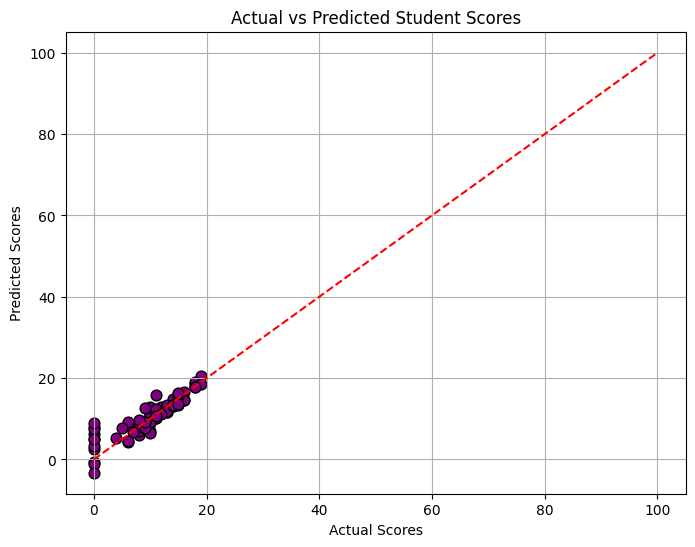

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(y_valid, prediction, color="purple", s=60, edgecolor="k")
plt.plot([0,100], [0,100], 'r--')  # perfect prediction line
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Student Scores")
plt.grid(True)
plt.show()